<a href="https://colab.research.google.com/github/DrueStaples/MNIST-Image-Prediction/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Welcome to your first mission to change lives!  Here, a company has created vending machines that dispense clothing to people by means of collecting trash. They plan to put these all over low income/ poverty suffering areas. They need your help to build a classifier in order to detect what clothing is what, so the machine dispenses the right clothes! Good Luck!!! **





General way of solving machine learning problems:

1.) Import Frameworks, API's, Libraries, etc 

2.) Import the dataset to training/ testing variables for both our input and output

3.) Explore the data

4.) Preprocess the data

5.) Build the model (layers + compile)

6.) Train the model

7.) Evaluate accuracy

8.) Make predictions

Step 1.) **Import** Frameworks, API's Libraries, etc.

In [156]:
from __future__ import absolute_import, division, print_function #helps with future versions of tensorflow

#import tensorflow for data flow and keras for constructing neural networks

import tensorflow as tf
from tensorflow import keras

#make sure you have the latest version of tensorflow
print(tf.__version__)

1.13.1


In [0]:
#import numpy for matrix construction and matplotlib for plotting  

import numpy as np
import matplotlib.pyplot as plt

Step 2.) **Import** the dataset to **training/ testing variables** for both our **input and output**

In [0]:
#load the dataset to the training/testing inputs/outputs

fashion_mnist = keras.datasets.fashion_mnist

(train_in, train_out), (test_in, test_out) = fashion_mnist.load_data()

In [0]:
#create class names for the clothing so the images aren't being referred to by numbers

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Step 3.) **Explore** your dataset to understand the **SIZE** of your training and test inputs and outputs 

In [0]:
#Explore the data! You'll see there are 60000 training images and 10000 test images all represented as 28x28pixels

#train_in.shape
#len(train_in)
#train_in
#test_in.shape
#len(test_in)

Step 4.) **Preprocess** the data helps us **VISUALLY UNDERSTAND** our dataset

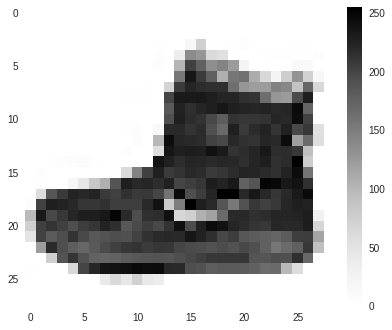

In [161]:
#this helps understand the data more (get a visualization to help understand how to data is being portrayed)

plt.figure() #creates graph, but doesnt dislay graph
plt.imshow(train_in[0])#'Im showing' you training image 0
plt.colorbar()#represents each pixel on a scale of 0-255 (display)
plt.grid(False)#False eliminates grid lines
plt.show()#showtime!

In [0]:
#now lets normalize the data by squishing the inputs that range from 0-255 to a range of 0.0-1.0

train_in, test_in = train_in / 255.0, test_in / 255.0

Verify everything is working up to this point, by displaying what you did. Try the first 16 images!

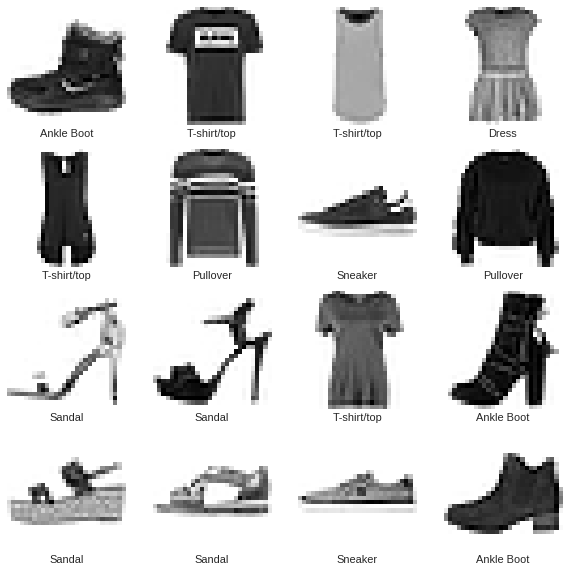

In [163]:
plt.figure(figsize=(10,10)) #how big is the overall size of our graph?
for x in range(16): #first 16 images
  plt.subplot(4,4,x+1) #4 images in each row AND column
  plt.imshow(train_in[x], cmap=plt.cm.binary) #shows each training image
  plt.xticks([]) #gets rid of ticks on x axis
  plt.yticks([]) #gets rid of ticks on y axis
  plt.xlabel(class_names[train_out[x]]) #DOES THE NAME MATCH THE IMAGE???
plt.show() #showtime!

Step 5.) Build the model (layers + compile)

In [0]:
#Construct the model via its layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Input Layer consists of flattening our 28x28 matrices into one long vector
    keras.layers.Dense(128, activation=tf.nn.relu), #Hidden Layer consists of 128 neurons and an activation of relu which returns the number if number > 0, 0 otherwise
    keras.layers.Dense(10, activation=tf.nn.softmax) #Output Layer consists of 10 neurons and an actiavation of softmax which is the sum of all 10 probabilities 
    
])

#Compile the model

model.compile(
optimizer='adam', #decreases our error (aka cost) to as close to 0 as possible
loss='sparse_categorical_crossentropy', #this will give us our error 
metrics=['accuracy'] #used to review training/testing steps of just how 'accurate' our images are correctly classified
)

Step 6.) Train the model Let us do this with 3 steps: training input, training output, and epochs


In [165]:
#fit means train. Within it, include the training inputs and outputs, as well as the # of epochs

model.fit(train_in, train_out, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.4970 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3770 - acc: 0.8635
Epoch 3/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3376 - acc: 0.8754
Epoch 4/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3126 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2958 - acc: 0.8898


Step 7.) Evaluate accuracy. Let's find out well this will do against our test dataset!

In [166]:
#save the test's loss and its accuracy

test_loss, test_acc = model.evaluate(test_in, test_out)

print('the accuracy of your 10,000 image test set is ', test_acc)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3443 - acc: 0.8773
the accuracy of your 10,000 image test set is  0.8773


Notice above, the accuracy (87%) of the test set is less than the accuracy of the training set (89%). This is an example of overfitting meaning our model does well on our training set but can't generalize as well with new datasets.  

Step 8.) Make predictions on the TEST set

In [0]:
#save your TEST predictions to a variable

predictions = model.predict(test_in)

In [168]:
#make a test prediction of image 0 which gives us...

predictions[0]

#an array of 10 numbers aka labels.The higher the number, the higher the 'confidence'. 

array([8.13511542e-06, 3.63417421e-08, 7.19118560e-08, 1.14610055e-08,
       2.04299809e-07, 2.13182345e-02, 5.40268911e-06, 3.93715277e-02,
       5.46949286e-06, 9.39290941e-01], dtype=float32)

In [169]:
#What label has the highest confidence?

np.argmax(predictions[0])

9

We just predicted that image 0 is most confident as label 9 which is the ankle boot!

In [170]:
#lets see if this prediction of the test set ACTUALLY matches up with our test result

test_out[0]

9

In [0]:
#try out some more predictions

#np.argmax(predictions[8])
#test_out[8]

#np.argmax(predictions[46])
#test_out[46]

#np.argmax(predictions[335])
#test_out[335]

Let's look at the 10 channels to see how it's graphed 

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.yticks([])
  plt.xticks([])
  plt.grid(False)
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Below is the 0th image, the prediction, and the prediction array

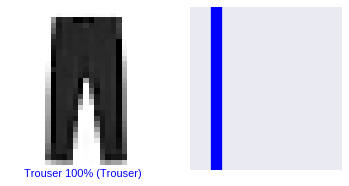

In [173]:
i = 864
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_out, test_in)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_out)
plt.show()

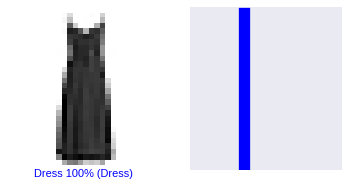

In [174]:
i = 13
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_out, test_in)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_out)
plt.show()


Lets try plotting several images at one time with their predictions! Blue means correct. Red means incorrect. The number is how confident our model is. Notice we can be 'confidently wrong.''

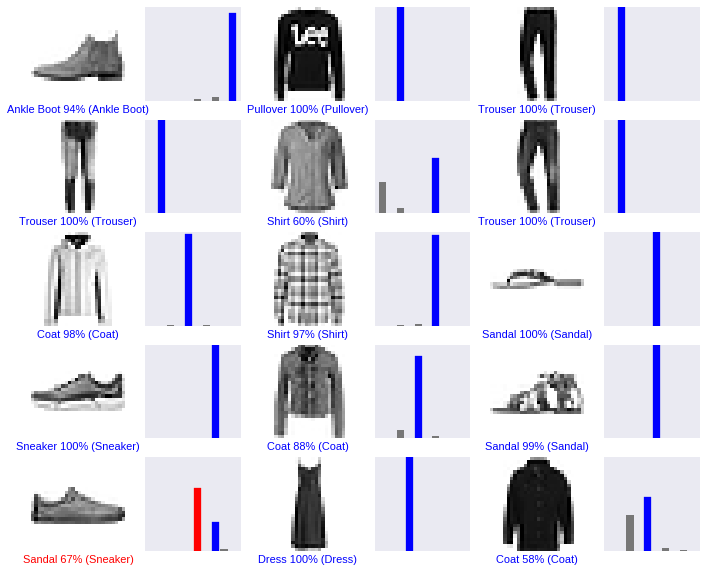

In [175]:
#plot the first ____ images, their predicted label, AND the true label (hopefully theyre the same, also they visually look like bar graphs)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_out, test_in)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_out)
plt.show()




Let's use our trained model to predict an image!

In [176]:
#Grab an image from the test dataset

img = test_in[0]

print(img.shape)

(28, 28)


In [177]:
#Add the image to a batch where it's the only member

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image!

In [178]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.13511542e-06 3.63417421e-08 7.19119839e-08 1.14610055e-08
  2.04299425e-07 2.13182028e-02 5.40268366e-06 3.93715166e-02
  5.46948695e-06 9.39290941e-01]]


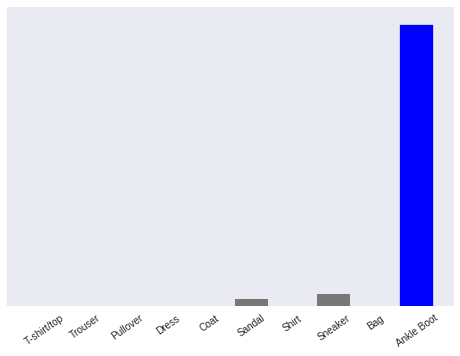

In [179]:
plot_value_array(0, predictions_single, test_out)
_ = plt.xticks(range(10), class_names, rotation=35)

In [180]:
np.argmax(predictions_single[0])

9

Again, our model predicts a label of 9! Which is ankle boot!

General way of solving machine learning problems:

1.) Import Frameworks, API's, Libraries, etc 

2.) Import the dataset to training/ testing variables for both our input and output

3.) Explore the data

4.) Preprocess the data

5.) Build the model (layers + compile)

6.) Train the model

7.) Evaluate accuracy

8.) Make predictions

Congrats!!! You have changed millions of lives based off of your hard work to complete this task! Now, you are ready for the next step. I encourage you to switch up the code and to understand what the code does! Have fun and happy coding!